In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Data Loading and Filtering

In [206]:
df = pd.read_csv('../zuu crew scores.csv')
df = df[df['CourseName']=='Foundations of ML']
del df['MemberName'], df['CourseName']
df.head()

,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CapstoneScore
0,3,79.9,43.7,2,0,62.8,5.0,45.3
1,2,76.8,95.6,6,0,87.4,2.7,78.8
2,3,96.6,75.9,8,0,98.4,2.8,65.4
4,2,83.2,24.0,6,0,41.8,4.2,40.1
7,3,86.5,88.0,5,0,23.9,1.3,68.2


In [207]:
Y = df['CapstoneScore'].values
X_df = df.drop(columns=['CapstoneScore'])

# Calculate mean and std for each feature (column)
mean = X_df.mean()
std = X_df.std()

# Standardize each column
X_standardized = (X_df - mean) / std

# Convert to numpy array
X = X_standardized.values

In [208]:
X = np.column_stack((
    np.ones(len(df)),
    X
))

#### Compute Cost

In [209]:
def compute_cost(X,beta,Y):
    y_hat = X.dot(beta) 
    m = len(Y)
    cost = (1 /(2 * m)) * np.sum((y_hat - Y)**2)
    return cost

#### Optimization

In [210]:
cost_history=[]
def gradient_descent(X,Y,beta,n_iter,lr):
    m = len(Y)

    for i in range(n_iter):
        y_hat = X.dot(beta) 
        gradient = (1/m) * X.T.dot(y_hat - Y)
        beta = beta - lr * gradient
        cost  = compute_cost(X,beta,Y)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"iteration: {i}, beta:{beta}, cost:{cost}")
    
    return beta


#### Checking

In [211]:
beta = np.random.randn(8)
n_iter = 1000
lr = 0.01

In [212]:
beta = gradient_descent(X,Y,beta,n_iter,lr)

iteration: 0, beta:[ 0.39479256  1.39941614 -1.26724644  0.83164957 -0.42988575  0.09458869
  0.12448948 -0.26214667], cost:1633.3865077073249
iteration: 100, beta:[ 3.50814079e+01 -1.43432225e-01  1.10338940e-02  1.04221726e+01
  7.82656732e-01 -5.19360874e-01  8.68837353e-01  1.05539477e+00], cost:227.370022584886
iteration: 200, beta:[47.77783093 -0.3627668   0.46205054 13.91813341  0.57052393 -0.3001672
  0.91124182  1.53095432], cost:39.933372070339864
iteration: 300, beta:[ 5.24251324e+01 -3.59071986e-01  6.28522636e-01  1.52698311e+01
  2.58574284e-01 -5.13007030e-02  8.99737362e-01  1.65488879e+00], cost:14.510554755445234
iteration: 400, beta:[ 5.41261950e+01 -3.42180847e-01  6.94622448e-01  1.58181388e+01
  4.74255706e-02  1.14488197e-01  9.07150064e-01  1.66569065e+00], cost:10.995933521260522
iteration: 500, beta:[54.74883894 -0.33702268  0.72302952 16.04925472 -0.07497092  0.21195346
  0.92409714  1.65074731], cost:10.495452734892606
iteration: 600, beta:[54.97674676 -0.33

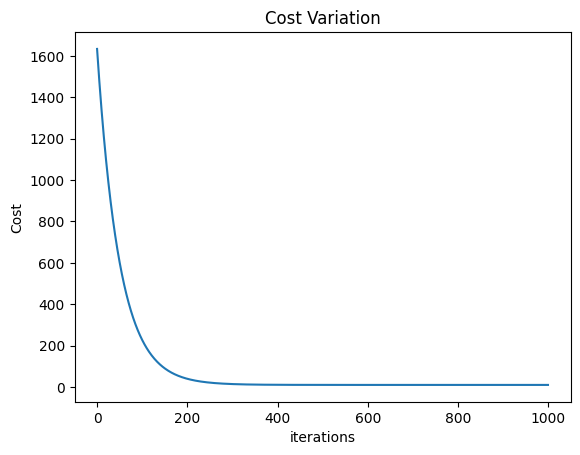

In [213]:
plt.plot(cost_history)
plt.title("Cost Variation")
plt.xlabel("iterations")
plt.ylabel("Cost")
plt.show()

#### Model Evaluation

In [214]:
Y_hat = X.dot(beta) 
Y_hat

array([49.96618157, 79.29323647, 68.47750226, 36.56521326, 71.05309742,
       82.30388949, 38.24863106, 56.22872259, 48.82215744, 45.5750296 ,
       59.96412458, 36.71753777, 39.52689178, 49.96388428, 56.82321406,
       30.83771508, 83.75115794, 28.99821231, 52.48331428, 75.82688476,
       64.9528476 , 42.13237326, 34.64092384, 79.91525582, 79.33102969,
       36.87398006, 44.72276932, 43.12039298, 49.58181473, 38.67174755,
       78.49603097, 39.95656952, 28.16791277, 61.440797  , 65.93500375,
       68.14503832, 29.3889208 , 42.32942762, 32.58457035, 61.16523808,
       62.67481735, 70.36118195, 56.33919645, 70.29124898, 54.57890409,
       57.15346886, 51.8839048 , 32.90645971, 59.57710711, 43.66059153,
       77.67806853, 39.47038906, 50.90998144, 76.61492434, 60.55838323,
       78.91326136, 75.19587032, 58.44444952, 70.87836577, 72.63001226,
       26.90323609, 51.79755607, 47.82016251, 79.68764127, 44.56673533,
       56.5476584 , 67.41129352, 47.80297607, 82.44195992, 42.93

In [215]:
def MSE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(e_i**2)

def MAE(Y,Y_hat):
    e_i = Y - Y_hat
    return np.mean(np.abs(e_i))

def R2_Score(Y,Y_hat):
    y_mean = np.mean(Y)
    e_i = Y - Y_hat
    std_i = Y - y_mean

    E = np.sum(e_i**2) / np.sum(std_i ** 2)
    return 1 - E

In [216]:
mse = MSE(Y, Y_hat)
mae = MAE(Y, Y_hat)
r2 = R2_Score(Y, Y_hat)

print(f"MSE : {mse}")
print(f"MAE : {mae}")
print(f"R2 Score : {r2}")

MSE : 20.81051904645872
MAE : 3.538687542184506
R2 Score : 0.927166888216171


In [217]:
lr_model = LinearRegression()
lr_model.fit(X[:, 1:], Y)  # skip the intercept column since sklearn adds it internally

print("Sklearn coefficients:", lr_model.coef_)
print("Sklearn intercept:", lr_model.intercept_)

Sklearn coefficients: [-0.35523215  0.7477395  16.23362197 -0.22249773  0.33544015  0.97752925
  1.61270231]
Sklearn intercept: 55.10833333333334
